# Eploratory Data Analysis

In [30]:
# Library Imports

# Pandas for dataframes
import pandas as pd

# Import Team Class
from Classes.team import Team

# Import Team Class
from Classes.team import Team

# Pickle import for data serialization and deserialization
import pickle

# Import CSV for read/write of data files
import csv

# For use of nan
import math

# Data Visualization
import seaborn as sns

### Import Data & Gather Keys

In [31]:
# Load in data_dictionary for parsing practice

# Load in stat labels csv as dataframe (then convert to list)
all_labels_df = pd.read_csv("Data/stat_labels.csv")
stat_labels_list = list(all_labels_df['Stat Label'])

# Load in keys (team names) csv as dataframe
teams_keys = pd.read_csv('Data/team_names.csv') 
team_keys_list = list(teams_keys['Team Name'])

# Read Pickle File as dictionary
file_to_read = open("Data/teams_dictionary.pkl", "rb")
teams_dictionary = pickle.load(file_to_read)

In [48]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

### Import Data For Analysis

In [33]:
target_year = '2012-13'
year_df = pd.read_csv(f'Data/Madness/{target_year}.csv')

## 3. Exploratory Data Analysis

- Data Shape
- Data Types
- Target variable
- Missing Values
- Constant features
- Cardinality
- Duplicate features
- Correlations
- Scale
- Distributions (skewness)
- Outliers

In [34]:
year_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 96 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Team Name            68 non-null     object 
 1   Team ID              68 non-null     int64  
 2   Test Year            68 non-null     object 
 3   Madness Result       68 non-null     float64
 4   g                    68 non-null     int64  
 5   mp_per_g             68 non-null     float64
 6   fg_per_g             68 non-null     float64
 7   fga_per_g            68 non-null     float64
 8   fg_pct               68 non-null     float64
 9   fg2_per_g            68 non-null     float64
 10  fg2a_per_g           68 non-null     float64
 11  fg2_pct              68 non-null     float64
 12  fg3_per_g            68 non-null     float64
 13  fg3a_per_g           68 non-null     float64
 14  fg3_pct              68 non-null     float64
 15  ft_per_g             68 non-null     float

In [35]:
year_df.shape

(68, 96)

### Observation

This dataset has:
- 96 features (5 categorical and 7 numerical)
- 68 observations

The target variable is ['Madness Result']

In [8]:
year_df.isnull().mean().sort_values(ascending=False)

g_rank                 1.0
opp_g_rank             1.0
opp_mp_per_g_rank      1.0
mp_per_g_rank          1.0
opp_fta_per_g          0.0
opp_blk_per_g          0.0
opp_stl_per_g          0.0
opp_ast_per_g          0.0
opp_trb_per_g          0.0
opp_drb_per_g          0.0
opp_orb_per_g          0.0
opp_ft_pct             0.0
Team Name              0.0
opp_tov_per_g          0.0
opp_fg3_pct            0.0
opp_fg3a_per_g         0.0
opp_fg3_per_g          0.0
opp_fg2_pct            0.0
opp_fg2a_per_g         0.0
opp_fg2_per_g          0.0
opp_fg_pct             0.0
opp_fga_per_g          0.0
opp_fg_per_g           0.0
opp_mp_per_g           0.0
opp_ft_per_g           0.0
opp_pts_per_g          0.0
opp_pf_per_g           0.0
opp_fta_per_g_rank     0.0
opp_pf_per_g_rank      0.0
opp_tov_per_g_rank     0.0
opp_blk_per_g_rank     0.0
opp_stl_per_g_rank     0.0
opp_ast_per_g_rank     0.0
opp_trb_per_g_rank     0.0
opp_drb_per_g_rank     0.0
opp_orb_per_g_rank     0.0
opp_ft_pct_rank        0.0
o

### Observation

- 4 features with missing values: ['g_rank', 'opp_g_rank', 'opp_mp_per_g_rank', 'mp_per_g_rank'] and will be dropped

In [9]:
year_df.nunique().sort_values(ascending=False)

Team Name              68
fg2a_per_g_rank        68
opp_fta_per_g_rank     68
opp_fg2_pct_rank       68
opp_fg_pct_rank        68
Team ID                68
drb_per_g_rank         68
ft_pct_rank            68
fg3_pct_rank           68
fg2_pct_rank           68
opp_pts_per_g_rank     68
opp_fg3_pct_rank       67
pts_per_g_rank         67
opp_fga_per_g_rank     67
opp_tov_per_g_rank     67
trb_per_g_rank         67
opp_fg2_per_g_rank     67
opp_fg2a_per_g_rank    67
opp_ft_pct_rank        67
fg_pct_rank            67
fga_per_g_rank         67
pf_per_g_rank          66
opp_fg_per_g_rank      66
fta_per_g_rank         66
fg3a_per_g_rank        66
fg3_per_g_rank         66
opp_fg3_per_g_rank     66
fg2_per_g_rank         66
opp_stl_per_g_rank     65
opp_pf_per_g_rank      65
opp_ft_per_g_rank      65
tov_per_g_rank         65
ast_per_g_rank         65
opp_orb_per_g_rank     65
opp_drb_per_g_rank     65
fg_per_g_rank          65
opp_ast_per_g_rank     65
ft_per_g_rank          65
opp_fg3a_per

### Observation

- ['Test Year'] is constant and will be dropped
- ['Team Name'] does not add any value & will be dropped
- ['Team ID'] is ordinal will be dropped

In [38]:
for col in year_df:
    print(col)
    print(year_df[col].unique())

Team Name
['Louisville Cardinals' 'Michigan Wolverines' 'Syracuse Orange'
 'Wichita State Shockers' 'Duke Blue Devils' 'Florida Gators'
 'Marquette Golden Eagles' 'Ohio State Buckeyes' 'Arizona Wildcats'
 'Florida Gulf Coast Eagles' 'Indiana Hoosiers' 'Kansas Jayhawks'
 'La Salle Explorers' 'Miami (FL) Hurricanes' 'Michigan State Spartans'
 'Oregon Ducks' 'Butler Bulldogs' 'California Golden Bears'
 'Colorado State Rams' 'Creighton Bluejays' 'Gonzaga Bulldogs'
 'Harvard Crimson' 'Illinois Fighting Illini' 'Iowa State Cyclones'
 'Memphis Tigers' 'Minnesota Golden Gophers' 'Mississippi Rebels'
 'North Carolina Tar Heels' 'Saint Louis Billikens'
 'San Diego State Aztecs' 'Temple Owls' 'Virginia Commonwealth Rams'
 'Akron Zips' 'Albany (NY) Great Danes' 'Belmont Bruins' 'Bucknell Bison'
 'Cincinnati Bearcats' 'Colorado Buffaloes' 'Davidson Wildcats'
 'Georgetown Hoyas' 'Iona Gaels' 'James Madison Dukes'
 'Kansas State Wildcats' 'Missouri Tigers' 'Montana Grizzlies'
 'NC State Wolfpack' 'Ne

### Observation

- ['g', 'opp_g'] are directly related to independed variable & will be dropped (extra games for teams that play more playoff games)
- ['mp_per_g', 'opp_mp_per_g'] is constant & will be dropped

In [39]:
year_df.describe()

,Team ID,Madness Result,g,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg2_per_g,fg2a_per_g,fg2_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,g_rank,mp_per_g_rank,fg_per_g_rank,fga_per_g_rank,fg_pct_rank,fg2_per_g_rank,fg2a_per_g_rank,fg2_pct_rank,fg3_per_g_rank,fg3a_per_g_rank,fg3_pct_rank,ft_per_g_rank,fta_per_g_rank,ft_pct_rank,orb_per_g_rank,drb_per_g_rank,trb_per_g_rank,ast_per_g_rank,stl_per_g_rank,blk_per_g_rank,tov_per_g_rank,pf_per_g_rank,pts_per_g_rank,opp_g,opp_mp_per_g,opp_fg_per_g,opp_fga_per_g,opp_fg_pct,opp_fg2_per_g,opp_fg2a_per_g,opp_fg2_pct,opp_fg3_per_g,opp_fg3a_per_g,opp_fg3_pct,opp_ft_per_g,opp_fta_per_g,opp_ft_pct,opp_orb_per_g,opp_drb_per_g,opp_trb_per_g,opp_ast_per_g,opp_stl_per_g,opp_blk_per_g,opp_tov_per_g,opp_pf_per_g,opp_pts_per_g,opp_g_rank,opp_mp_per_g_rank,opp_fg_per_g_rank,opp_fga_per_g_rank,opp_fg_pct_rank,opp_fg2_per_g_rank,opp_fg2a_per_g_rank,opp_fg2_pct_rank,opp_fg3_per_g_rank,opp_fg3a_per_g_rank,opp_fg3_pct_rank,opp_ft_per_g_rank,opp_fta_per_g_rank,opp_ft_pct_rank,opp_orb_per_g_rank,opp_drb_per_g_rank,opp_trb_per_g_rank,opp_ast_per_g_rank,opp_stl_per_g_rank,opp_blk_per_g_rank,opp_tov_per_g_rank,opp_pf_per_g_rank,opp_pts_per_g_rank
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,0.0,0.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,0.0,0.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,229.588235,2.867647,34.955882,40.300000,25.133824,55.573529,0.452279,18.650000,37.242647,0.500956,6.480882,18.333824,0.353074,14.688235,20.736765,0.708735,11.229412,21.658824,32.879412,13.826471,6.995588,3.807353,12.392647,16.860294,71.441176,NaN,NaN,106.088235,156.882353,95.926471,122.220588,164.029412,98.426471,146.338235,164.338235,128.088235,118.632353,133.382353,134.014706,158.264706,100.029412,113.382353,114.632353,152.955882,143.176471,228.941176,218.323529,96.220588,34.955882,40.300000,22.570588,55.123529,0.409206,16.676471,37.044118,0.449735,5.897059,18.075000,0.325662,12.413235,18.019118,0.688750,10.610294,22.191176,32.795588,11.507353,6.116176,3.167647,13.454412,18.236765,63.436765,NaN,NaN,124.617647,180.088235,98.970588,134.588235,185.191176,100.411765,146.955882,171.661765,122.794118,115.132353,118.000000,157.852941,153.764706,112.294118,117.867647,233.117647,120.485294,131.926471,172.558824,206.514706,104.867647
std,123.647578,1.391921,1.856283,0.268217,1.801128,3.201428,0.021698,1.823683,3.412108,0.025189,1.163404,2.771799,0.027237,1.671672,2.186588,0.033601,1.655029,1.510879,2.245098,1.649931,1.383963,1.107682,1.487793,1.555265,4.231094,NaN,NaN,85.717644,95.419659,79.039819,90.353179,96.901238,77.100306,95.594543,99.180314,98.290422,85.960405,90.109391,90.884787,100.454284,79.607052,85.657253,90.482604,96.400042,92.278932,94.802211,89.813977,74.195153,1.856283,0.268217,1.886010,3.063074,0.021389,1.818489,3.006728,0.026115,0.811111,2.152151,0.020450,1.562041,2.223635,0.023114,1.260081,1.640052,2.398161,1.467388,0.719994,0.437579,1.871103,1.322244,4.311211,NaN,NaN,94.272395,96.430895,80.033943,99.330480,97.441334,82.820834,93.092865,104.376273,84.728638,81.217766,83.431445,102.842912,98.745280,88.764498,94.685482,90.616385,83.682858,83.496772,99.63970

In [13]:
a = year_df.dtypes
category_count = 0
numerical_count = 0
for i in a:
    if i == 'object':
        category_count+=1
    else:
        numerical_count+=1
        
print(f'categorical: {category_count}')
print(f'numerical: {numerical_count}')

categorical: 0
numerical: 89


In [14]:
null_sorted = year_df.isna().sum(axis=0).sort_values(ascending=False)
null_sorted[null_sorted>0]

Series([], dtype: int64)

### Observation

- Data has no missing values once values are dropped
- Data is all numerical

In [41]:
year_df.skew().sort_values(ascending=False)

/var/folders/9b/p3b6_xms07s4qmgrgn172by00000gn/T/ipykernel_37293/2565807577.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  year_df.skew().sort_values(ascending=False)


Madness Result         1.543595
opp_pts_per_g_rank     1.066273
fg_pct_rank            0.953300
mp_per_g               0.884616
opp_mp_per_g           0.884616
opp_fg_pct_rank        0.878590
drb_per_g_rank         0.825876
opp_fg_per_g_rank      0.783919
ast_per_g_rank         0.783715
fg2_pct_rank           0.763191
opp_fg2_pct_rank       0.738195
opp_fg_per_g           0.733367
fg_per_g_rank          0.728715
stl_per_g              0.725540
trb_per_g_rank         0.724623
opp_trb_per_g_rank     0.724485
opp_fg3_pct_rank       0.675482
opp_tov_per_g          0.638189
opp_drb_per_g_rank     0.631319
opp_pts_per_g          0.602627
opp_fg2_per_g          0.586272
opp_fg2_per_g_rank     0.573266
pts_per_g_rank         0.568076
fg2_per_g_rank         0.566393
ft_per_g_rank          0.548332
opp_stl_per_g_rank     0.498611
blk_per_g              0.496034
opp_blk_per_g_rank     0.450348
fg3_per_g_rank         0.407737
opp_ast_per_g          0.405243
fga_per_g              0.380816
fg3_pct_

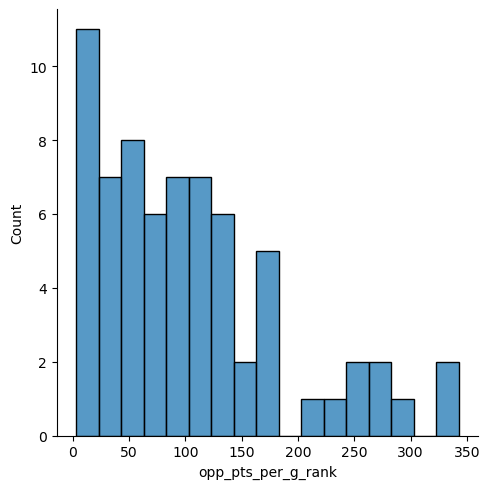

In [46]:
sns.displot(year_df, x="opp_pts_per_g_rank", binwidth=20)

### Observation

- Many of the variables have significant skewnewss
- Data will be scales & variance will be stabilized

In [53]:
numerical_correlations = year_df.corr().abs()

numerical_correlations = numerical_correlations.unstack()
numerical_correlations_sorted = numerical_correlations.sort_values(ascending=False)
numerical_correlations_sorted[(numerical_correlations_sorted<1) & (numerical_correlations_sorted>0.6)]

ast_per_g_rank       opp_ast_per_g_rank    0.999982
opp_ast_per_g_rank   ast_per_g_rank        0.999982
opp_blk_per_g        opp_blk_per_g_rank    0.989134
opp_blk_per_g_rank   opp_blk_per_g         0.989134
opp_fg2a_per_g_rank  opp_fg2a_per_g        0.989057
                                             ...   
fga_per_g_rank       pts_per_g_rank        0.606710
fg2_per_g            fga_per_g             0.601270
fga_per_g            fg2_per_g             0.601270
fg_pct               fg_per_g              0.601226
fg_per_g             fg_pct                0.601226
Length: 438, dtype: float64

### Observation

- Many of the variables have high colinearity
- Colinear varaibles will be evaluated in feature engineering

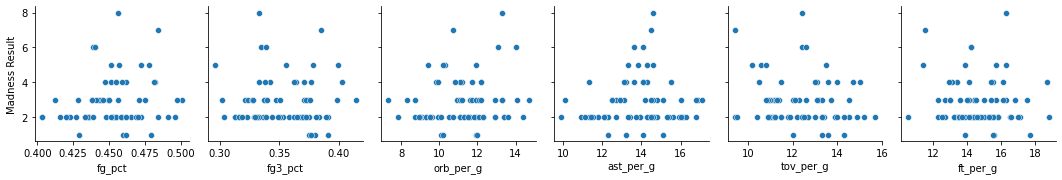

In [15]:
sns.pairplot(
    year_df,
    x_vars=['fg_pct','fg3_pct','orb_per_g','ast_per_g','tov_per_g','ft_per_g'],
    y_vars=["Madness Result"],
)

In [16]:
# sns.set(style="ticks", color_codes=True)
# g2 = sns.pairplot(data=year_df,
#                   y_vars=['Madness Result'])

# g2.savefig("out.png") 

#import matplotlib.pyplot as plt
#plt.show()